# Visual dataset analysis

In [1]:
from segmentizer import Segmentizer
from segmentizer.data_loader import LASIESTADataLoader
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from tqdm import tqdm_notebook, tnrange
from IPython.display import clear_output
import seaborn as sns
import pandas as pd

In [2]:
data_loader = LASIESTADataLoader('../datasets/I_SI_01', name='I_SI_01')

In [3]:
red_frame_statistics = [[[] for _ in range(353)]  for _ in range(288)] 
green_frame_statistics = [[[] for _ in range(353)]  for _ in range(288)] 
blue_frame_statistics = [[[] for _ in range(353)]  for _ in range(288)] 

data_loader.set_next_frame_idx(0)

for original_frame in tqdm_notebook(data_loader, total=data_loader.get_nr_of_frames()):
    for i, row in enumerate(original_frame):
        for j, rgb in enumerate(row):
            red_frame_statistics[i][j].append(rgb[0])
            green_frame_statistics[i][j].append(rgb[1])
            blue_frame_statistics[i][j].append(rgb[2])
           

HBox(children=(IntProgress(value=0, max=300), HTML(value='')))

## I_SI_01 - Analyze distribution of RED color channel

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


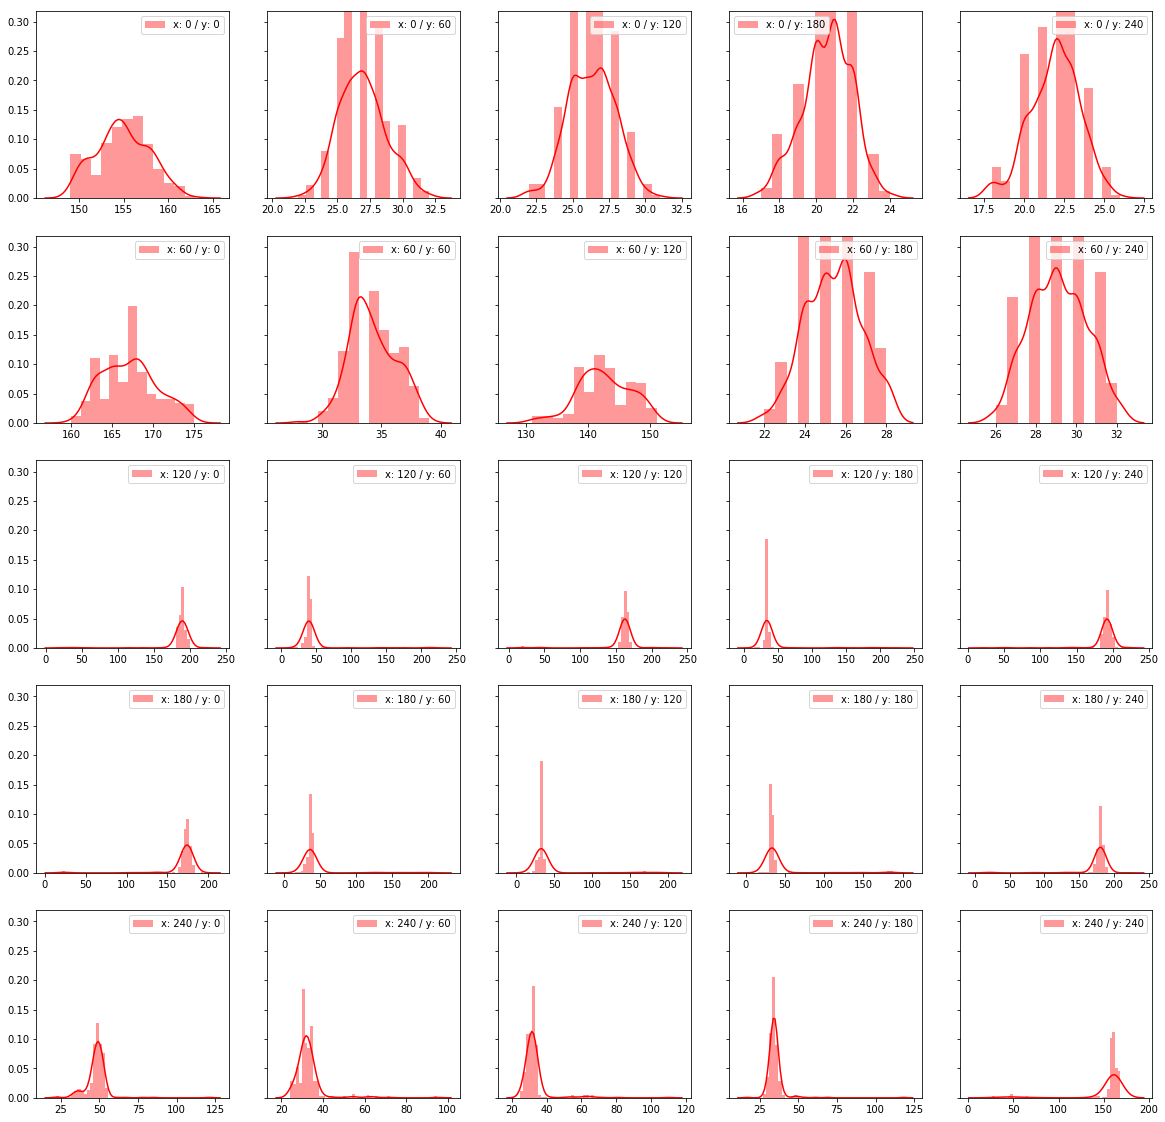

In [7]:
fig, ax = plt.subplots(figsize=(20,20), nrows=5, ncols=5, sharey=True)

for i in range(5):
    for j in range(5):
        sns.distplot(red_frame_statistics[i*60][j*60], color='red', ax=ax[i][j])
        ax[i][j].legend(['x: ' + str(i*60) + ' / ' + 'y: ' + str(j*60)])
        
plt.show()

## I_SI_01 - Analyze distribution of GREEN color channel

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


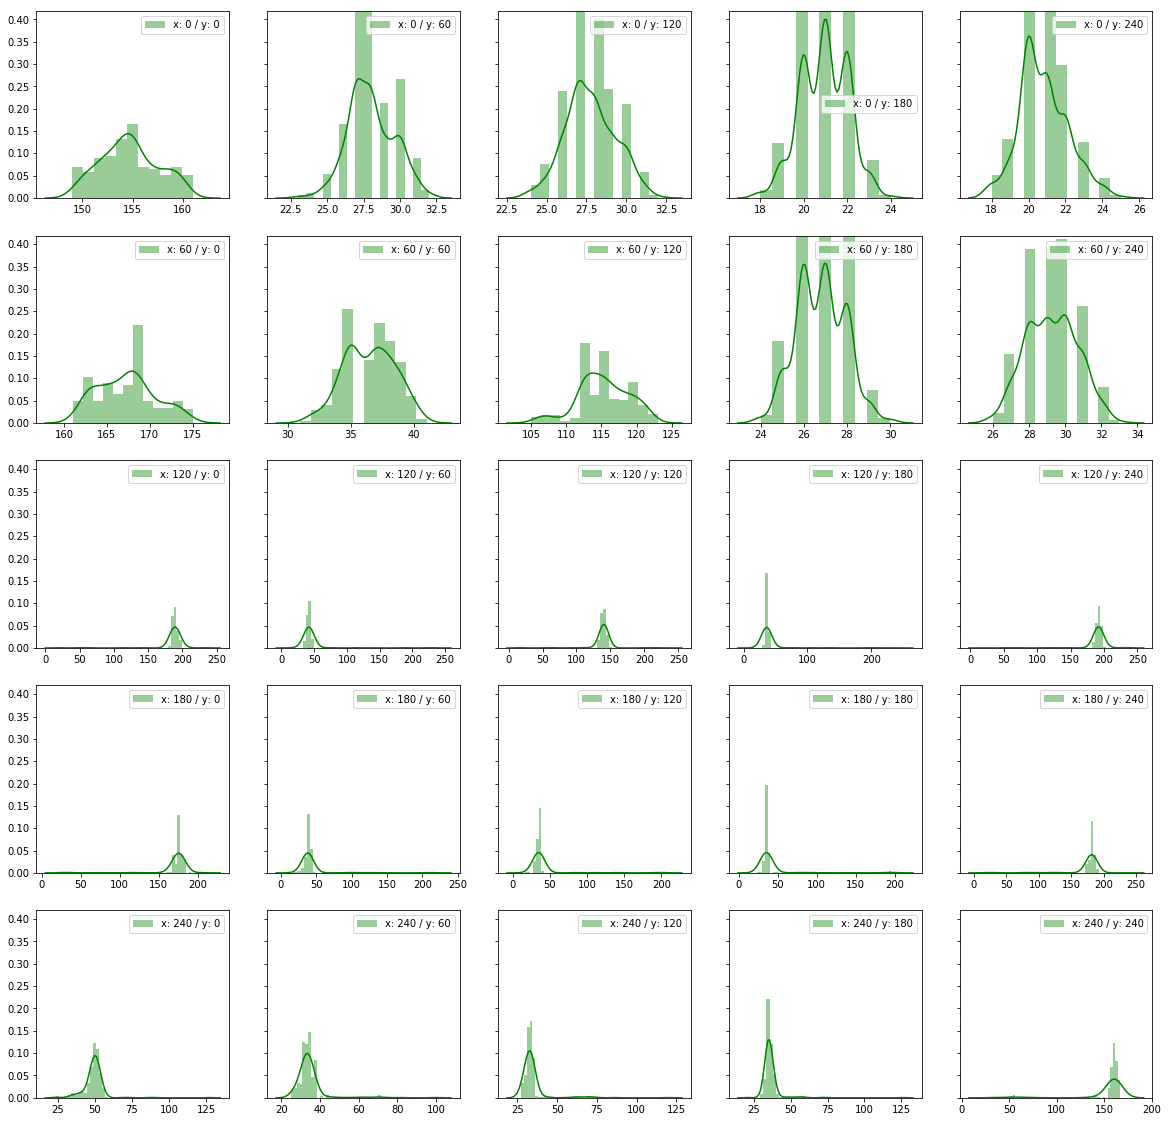

In [8]:
fig, ax = plt.subplots(figsize=(20,20), nrows=5, ncols=5, sharey=True)

for i in range(5):
    for j in range(5):
        sns.distplot(green_frame_statistics[i*60][j*60], color='green', ax=ax[i][j])
        ax[i][j].legend(['x: ' + str(i*60) + ' / ' + 'y: ' + str(j*60)])
        
plt.show()

## I_SI_01 - Analyze distribution of BLUE color channel

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


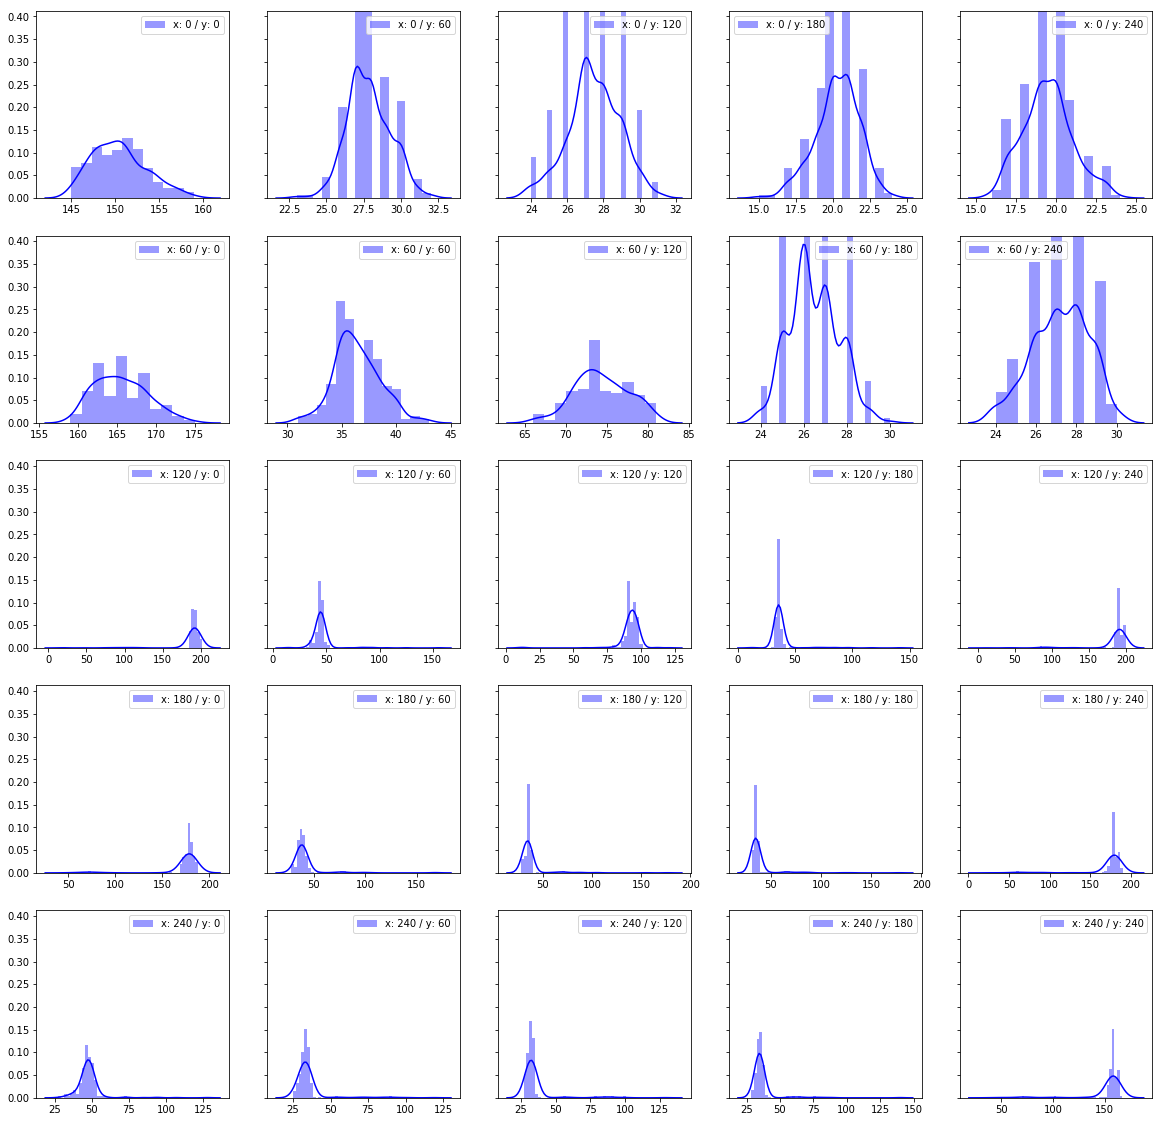

In [9]:
fig, ax = plt.subplots(figsize=(20,20), nrows=5, ncols=5, sharey=True)

for i in range(5):
    for j in range(5):
        sns.distplot(blue_frame_statistics[i*60][j*60], color='blue', ax=ax[i][j])
        ax[i][j].legend(['x: ' + str(i*60) + ' / ' + 'y: ' + str(j*60)])
        
plt.show()

## "Running" histogram analysis

In [8]:
fig = plt.figure(figsize=(20,10))

def _animate(i,y,x):
    
    fig.clf()
    ax1 = fig.add_subplot(231)
    ax2 = fig.add_subplot(232)
    ax3 = fig.add_subplot(233)
    ax4 = fig.add_subplot(234)
    ax5 = fig.add_subplot(235)

    # Histogram
    sns.distplot(red_frame_statistics[y][x][:i], kde=False, norm_hist=True, ax=ax1, color='red')
    sns.distplot(green_frame_statistics[y][x][:i], kde=False, norm_hist=True, ax=ax2, color='green')
    sns.distplot(blue_frame_statistics[y][x][:i], kde=False, norm_hist=True, ax=ax3, color='blue')
    
    # Full frame
    frame = data_loader.get_next_frame()
    marked_frame = frame.copy()
    marked_frame[y-5:y+5,x-5:x+5] = [255,0,0]
    ax4.imshow(marked_frame, animated=True)
    ax4.axis('off')

    # Relevant regions
    ax5.imshow([[frame[y,x]]], animated=True)
    ax5.axis('off')
    
    return fig

def render_histogram_video(data_loader, x, y, frames=None):
    
    data_loader.set_next_frame_idx(0)

    if frames is None:
        anim = animation.FuncAnimation(fig, _animate, frames=data_loader.get_nr_of_frames()-1, fargs=[y,x])
    else:
        anim = animation.FuncAnimation(fig, _animate, frames=frames, fargs=[y,x])
        
    anim.save('histogram_'+ data_loader.get_name() + '_' + str(x) + '_' + str(y) + '.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
    
    print("Finished rendering video")

In [ ]:
render_histogram_video(data_loader, 50, 140)

<video controls width="1000px" src="videos/histogram_I_SI_01_50_140.mp4" />

In [ ]:
render_histogram_video(data_loader, 200, 140)

<video controls width="1000px" src="videos/histogram_I_SI_01_200_140.mp4" />

## Sequence with illumination changes

In [4]:
data_loader = LASIESTADataLoader('../datasets/I_IL_01', name='I_IL_01')

In [5]:
render_histogram_video(data_loader, 200, 140)

NameError: name 'render_histogram_video' is not defined

<video controls width="1000px" src="videos/histogram_I_IL_01_200_140.mp4" />

## Sequence with non-completely static cameras

In [20]:
data_loader = LASIESTADataLoader('../datasets/I_MC_01', name='I_MC_01')

In [25]:
render_histogram_video(data_loader, 240, 160)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


Finished rendering video


<video controls width="1000px" src="videos/histogram_I_MC_01_240_160.mp4" />

## Sequences not containing camouflage, occlusions, illumination changes, modified background, camera motion, or bootstrapping.

In [9]:
data_loader = LASIESTADataLoader('../datasets/I_SI_01', name='I_SI_01')

In [10]:
render_histogram_video(data_loader, 240, 160)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


Finished rendering video


<video controls width="1000px" src="videos/histogram_I_SI_01_240_160.mp4" />

## Sequences containing moving objects from the first frame.

In [11]:
data_loader = LASIESTADataLoader('../datasets/I_BS_01', name='I_BS_01')

In [14]:
render_histogram_video(data_loader, 170, 150)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


Finished rendering video


<video controls width="1000px" src="videos/histogram_I_BS_01_170_150.mp4" />

## Sequences with global illumination changes.

In [15]:
data_loader = LASIESTADataLoader('../datasets/I_IL_01', name='I_IL_01')

In [16]:
render_histogram_video(data_loader, 150, 150)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


Finished rendering video


<video controls width="1000px" src="videos/histogram_I_IL_01_150_150.mp4" />